In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
# Read the csv data
content = pd.read_csv("Content.csv")
reaction = pd.read_csv("Reactions.csv")
reactiontypes = pd.read_csv("ReactionTypes.csv")

In [3]:
# Understand the data
content.head(5)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [4]:
reaction.head(5)

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [5]:
reactiontypes.head(5)

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [6]:
del content["Unnamed: 0"]
del reaction["Unnamed: 0"]
del reactiontypes["Unnamed: 0"]

In [7]:
content.head(2)

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...


In [8]:
content["Category"].head(10)

0           Studying
1     healthy eating
2     healthy eating
3         technology
4               food
5            cooking
6               dogs
7         technology
8             soccer
9    public speaking
Name: Category, dtype: object

In [9]:
content["Category"]=content["Category"].astype(str)

In [10]:
def turn(x):
    x =x.replace('"', "")
    return x

content["Category"]=content["Category"].apply(lambda x : turn(x) )

In [11]:
content["Category"]

0             Studying
1       healthy eating
2       healthy eating
3           technology
4                 food
            ...       
995    public speaking
996         technology
997           veganism
998            culture
999         technology
Name: Category, Length: 1000, dtype: object

In [12]:
content = content.rename(columns={"Type":"Content Type"})

In [13]:
content.head()

,Content ID,User ID,Content Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [14]:
content.columns

Index(['Content ID', 'User ID', 'Content Type', 'Category', 'URL'], dtype='object')

In [15]:
reaction.columns

Index(['Content ID', 'User ID', 'Type', 'Datetime'], dtype='object')

In [16]:
reactiontypes.columns

Index(['Type', 'Sentiment', 'Score'], dtype='object')

In [17]:
del content["User ID"]
del reaction["User ID"]

In [18]:
reaction.head()

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [19]:
content.head()

,Content ID,Content Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [20]:
# Merging of columns
reaction = reaction.merge(content[["Content ID",'Category']], left_on="Content ID", right_on="Content ID", how='inner')

In [21]:
reaction.head(3)

,Content ID,Type,Datetime,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,Studying


In [22]:
reaction = reaction.merge(reactiontypes[["Type",'Score']], left_on="Type", right_on="Type", how="inner")

In [23]:
reaction.head(3)

,Content ID,Type,Datetime,Category,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0


In [24]:
reactiontypes = reaction.copy()

In [25]:
reactiontypes

,Content ID,Type,Datetime,Category,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0
...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,veganism,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,veganism,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,culture,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,culture,72


In [26]:
reactiontypes["Category"].max()

'veganism'

In [27]:
len(reactiontypes["Category"]=="veganism")

24573

In [28]:
reactiontypes.isnull().sum()

Content ID    0
Type          0
Datetime      0
Category      0
Score         0
dtype: int64

In [29]:
#Groupby calculation
reaction = reaction.groupby("Category")["Score"].sum()

In [30]:
reaction = reaction.sort_values(ascending=False)

In [31]:
reaction.to_csv("cleaned_data.csv")

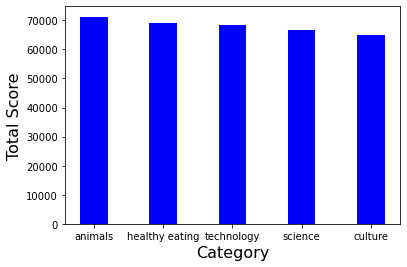

In [33]:
# Plot the values

y = reaction.values
y = y[:5]
x = reaction.index
x = x[:5]
plt.bar(x,y,width = 0.4,color="blue")
plt.ylabel("Total Score",fontsize = 16,color="black")
plt.xlabel("Category",fontsize = 16,color="black")
plt.show() 

- We can clearly state that the total score is higher in case of animals category and healthy-eating is in the second place

In [34]:
reactiontypes

,Content ID,Type,Datetime,Category,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0
...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,veganism,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,veganism,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,culture,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,culture,72


In [35]:
# Changing it to a respective date format
reactiontypes['Datetime'] = pd.to_datetime(reactiontypes['Datetime'] ,infer_datetime_format=True)

In [36]:
reactiontypes["Datetime"]

0       2020-11-07 09:43:50
1       2021-01-06 19:13:01
2       2021-04-09 02:46:20
3       2021-03-28 21:15:26
4       2020-08-04 05:40:33
                ...        
24568   2020-10-04 22:26:33
24569   2020-09-18 10:50:50
24570   2020-10-31 03:58:44
24571   2020-06-25 15:12:29
24572   2020-12-17 16:32:57
Name: Datetime, Length: 24573, dtype: datetime64[ns]

In [37]:
reactiontypes["Month"] = reactiontypes["Datetime"].dt.month

In [38]:
reactiontypes["Month"]

0        11
1         1
2         4
3         3
4         8
         ..
24568    10
24569     9
24570    10
24571     6
24572    12
Name: Month, Length: 24573, dtype: int64

In [39]:
data = reactiontypes.copy()

In [40]:
data.head()

,Content ID,Type,Datetime,Category,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0,11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0,1
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0,4
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0,3
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0,8


In [41]:
data.isnull().sum()

Content ID    0
Type          0
Datetime      0
Category      0
Score         0
Month         0
dtype: int64

In [42]:
data["Count"] = data.groupby('Month')['Month'].transform('count')

In [43]:
data =data.drop_duplicates(subset=["Month"])

In [44]:
data.head()

,Content ID,Type,Datetime,Category,Score,Month,Count
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0,11,2034
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0,1,2126
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0,4,1974
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0,3,2012
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0,8,2114


In [45]:
data.reset_index()

,index,Content ID,Type,Datetime,Category,Score,Month,Count
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0,11,2034
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0,1,2126
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0,4,1974
3,3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0,3,2012
4,4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0,8,2114
5,7,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-02-11 20:10:20,dogs,0,2,1914
6,8,b18cb63f-4c8e-44ee-a47f-541e95191d11,disgust,2021-05-27 01:44:22,public speaking,0,5,2138
7,12,0be59876-d70c-486c-8e0b-a06bef7a2cd6,disgust,2020-09-11 16:22:49,tennis,0,9,2022
8,13,0be59876-d70c-486c-8e0b-a06bef7a2cd6,disgust,2020-10-13 16:31:34,tennis,0,10,2056
9,14,0be59876-d70c-486c-8e0b-a06bef7a2cd6,disgust,2020-07-23 19:31:31,tennis,0,7,2070


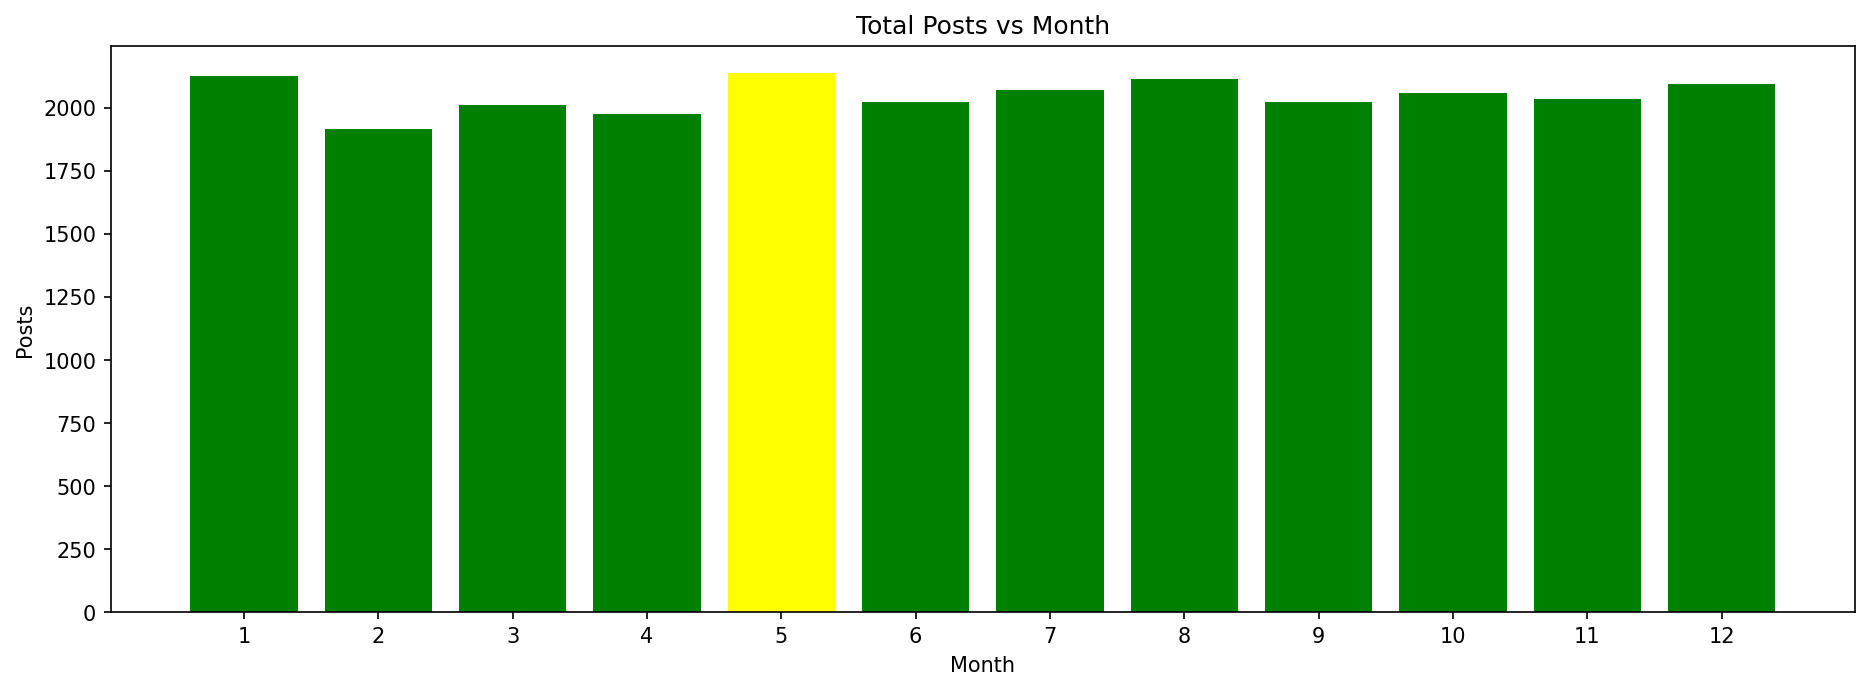

In [46]:
fig = plt.figure(figsize=(15,5), dpi = 150)
ax = plt.subplot()
x = data["Month"]
y = data["Count"]
ax.set_xticks(np.arange(13))
plt.title("Total Posts vs Month")
plt.xlabel("Month")
plt.ylabel("Posts")
colors = ["green" if i != 5 else "yellow" for i in x]
plt.bar(x, y,color=colors) 
plt.show()

- With respect to the bar plot, the total posts remains higher in the 5th month containing about 2138 posts